# BabyECG data
###### Author: Mokhtar Z. Alaya <alayaelm@utc.fr>

In [1]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot
# from plotly import tools
# init_notebook_mode(connected=True) ## plotly init
# from scipy.stats import mannwhitneyu

import sys
sys.path.append('/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/src')

from src.utils import *
from src.kernels import Kernel

path_data = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/data/"

/Users/mzalaya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_babyecg = pd.read_csv(path_data + 'BabyECG.csv')
df_babyecg.head(), df_babyecg.shape

(   Unnamed: 0    x
 0           1  129
 1           2  130
 2           3  123
 3           4  126
 4           5  125,
 (2048, 2))

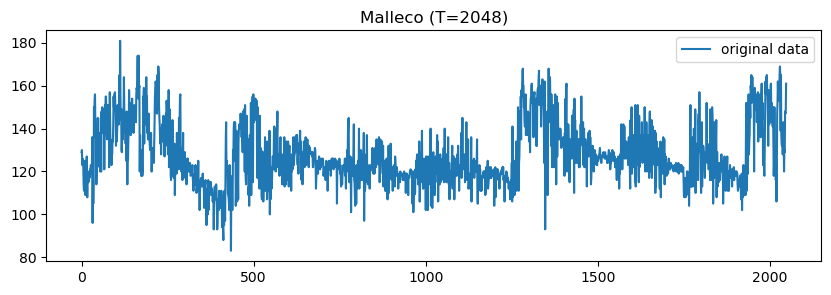

In [3]:
plt.rcParams["figure.figsize"] = (10,3)
plt.plot(df_babyecg['x'], label="original data")
# plt.plot(df_babyecg['x'].diff(), label="diff")
plt.legend()
plt.title("Malleco (T=2048)")
plt.show()

In [4]:
# C = 2
import logging

logging.basicConfig(
    format="%(asctime)s %(message)s", datefmt="%Y/%m/%d %H:%M:%S", level=logging.INFO
)

space_kernel = "gaussian" # "silverman"
time_kernel = "uniform"
T = df_babyecg['x'].shape[0]
d = 1
# bandwidth = T **(-0.4 / (d+1)) / 0.05
bandwidth = T **(-0.4 / (d+1)) / 1.5 # 1.6
X_dict = df_babyecg['x'].values.reshape(-1,1) #df_malleco['Value'].diff().values.reshape(-1, 1)
X_tvar_2 = df_babyecg['x'].values #df_malleco['Value'].diff().values

GaussUnifKernel = Kernel(T=T, bandwidth=bandwidth, space_kernel=space_kernel, time_kernel=time_kernel)
GaussUnifKernel 
Y_t_T = df_babyecg['x'].values
weights = {}
for t in range(T):
    weights[str(t)] = GaussUnifKernel.fit(X_dict, t)
    
m_hat= [np.sum(weights[str(t)] * Y_t_T) for t in range(T)]

2024/06/03 23:10:24 Saved result in file BabyECG-NW-Gaussian-sp-Uniform-time-C-2.pdf


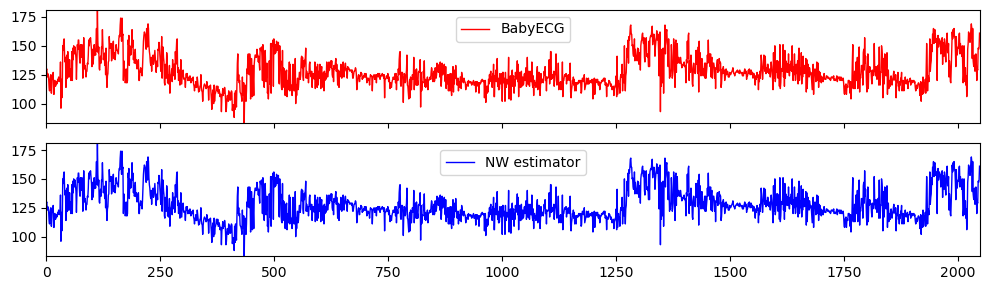

In [36]:
import logging

logging.basicConfig(
    format="%(asctime)s %(message)s", datefmt="%Y/%m/%d %H:%M:%S", level=logging.INFO
)

path_fig = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/figs/"

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,3), sharex=True)
# plt.subplots_adjust(wspace=0, hspace=0.5)
# plt.rcParams['axes.grid'] = True
# plt.rcParams['axes.facecolor'] = 'black'

output_filename = "BabyECG-NW-Gaussian-sp-Uniform-time-C-2.pdf"
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

line1, = ax[0].plot(X_tvar_2, lw=1, label="BabyECG", color="#FF0000")  # #, color="r") #, cmap=cm)
ax[0].set_xlim(0, T)
ax[0].set_ylim(min(min(m_hat), min(X_tvar_2)),  max(max(m_hat), max(X_tvar_2)))
ax[0].legend(loc='upper center')

line2, = ax[1].plot(np.array(m_hat), lw=1, label="NW estimator" , c="#0000FF")#cm_bright[0]) #"orange")
ax[1].set_xlim(0, T)
ax[1].set_ylim(min(min(m_hat), min(X_tvar_2)),  max(max(m_hat), max(X_tvar_2)))
ax[1].legend(loc='upper center')
# fig.legend([line1, line2], ['BabyECG', 'NW estimator'], loc='lower center', bbox_to_anchor=[0.5, 0.47], ncol=2)
plt.savefig(path_fig+"BabyECG-NW-Gaussian-sp-Uniform-time-C-1.5.pdf", dpi=300)
plt.tight_layout()
logging.info("Saved result in file %s" % output_filename)

In [6]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

np.sqrt(mse(np.array(m_hat), X_tvar_2)), mae(np.array(m_hat), X_tvar_2)

(2.8891138227752783e-11, 1.9279897123247736e-11)

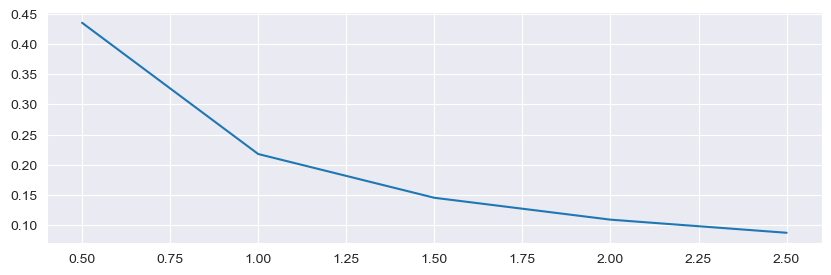

In [9]:
C = np.array([0.5, 1, 1.5, 2, 2.5])
bandwidth = T **(-0.4 / (d+1)) / C
plt.plot(C, bandwidth, label="Bandwidth")

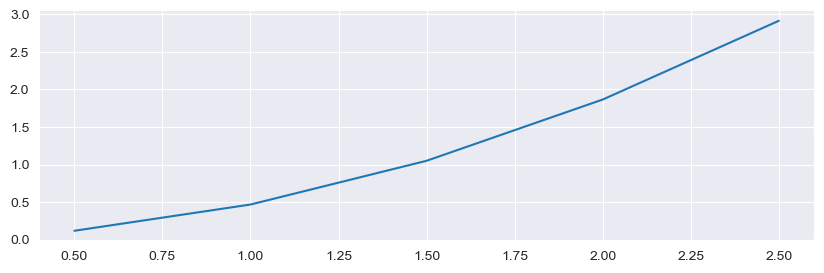

In [10]:
plt.plot(C, 1 / (T**(1/2) * bandwidth**2), label="Bandwidth")

In [11]:
1 / (T**(1/2) * (T **(-0.4 / (d+1)))**2)

0.4665164957684038

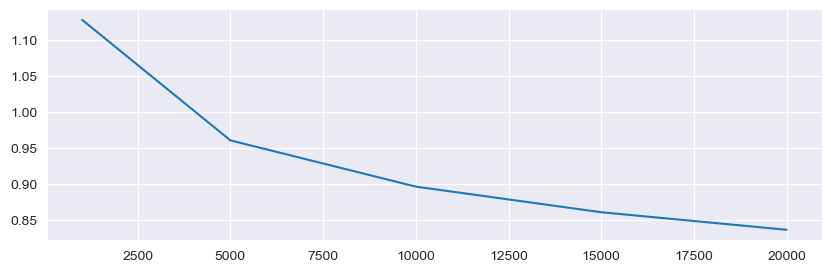

In [15]:
C = 1.5
T = np.array([1000, 5000, 10000, 15000, 20000])
bandwidth = T **(-0.4 / (d+1)) / C
plt.plot(T, 1 / (T**(1/2) * bandwidth**2), label="Bandwidth")

In [20]:
# C = 2
import logging

logging.basicConfig(
    format="%(asctime)s %(message)s", datefmt="%Y/%m/%d %H:%M:%S", level=logging.INFO
)

space_kernel = "gaussian" # "silverman"
time_kernel = "uniform"
T = df_babyecg['x'].shape[0]
d = 1
# bandwidth = T **(-0.4 / (d+1)) / 0.05
bandwidth = T **(-0.4 / (d+1)) * 1. / np.std(X_tvar_2) #/ 1.5 # 1.6
X_dict = df_babyecg['x'].values.reshape(-1,1) #df_malleco['Value'].diff().values.reshape(-1, 1)
X_tvar_2 = df_babyecg['x'].values #df_malleco['Value'].diff().values

GaussUnifKernel = Kernel(T=T, bandwidth=bandwidth, space_kernel=space_kernel, time_kernel=time_kernel)
GaussUnifKernel 
Y_t_T = df_babyecg['x'].values
weights = {}
for t in range(T):
    weights[str(t)] = GaussUnifKernel.fit(X_dict, t)
    
m_hat= [np.sum(weights[str(t)] * Y_t_T) for t in range(T)]

In [21]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

np.sqrt(mse(np.array(m_hat), X_tvar_2)), mae(np.array(m_hat), X_tvar_2)

(7.417752229561566e-15, 2.6645352591003757e-15)

In [ ]:
# (0.7977074876426179, 0.6733494215920931) 

In [22]:
np.std(X_tvar_2)

13.810616196469331